In [ ]:
import numpy as np
import numba
import matplotlib.pyplot as plt

In [ ]:
@numba.jit
def laplas(n, p, k):
  q = 1 - p
  x =(k - n * p) / np.sqrt(n*p*q)
  return (1/np.sqrt(np.pi * 2))*np.exp(-(x**2 / 2))

def graphplot(x, y):
  plt.plot(x, y)

def laplas_theorem(n, p, k):
  q = 1 - p
  f = laplas(n, p, k)
  return 1/np.sqrt(n*p*q)*f



# Работа с данными

In [ ]:
### Установка и импорт библиотеки pandas profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Загрузка

In [ ]:
df = pd.read_csv("vgsales.csv", encoding='utf-8')

In [ ]:
profile = ProfileReport(df, title='Videogames sales')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Анализ данных


In [ ]:
df = df.dropna(subset=["Year"]) #Так как игр с отсутствующим годом немного (всего 1.61%) удаляем их из датасета
df = df.dropna(subset=['Publisher'])
df.head()

Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37

[5 rows x 11 columns]

In [ ]:
# platforms = list(set(df['Platform'])) # Список всех платформ
# platforms = {platforms[i]: i for i in range(len(platforms))} # Нумерованный список всех платформ
# df.Platform = [platforms[item] for item in df.Platform]

In [ ]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=df['Year'], y=df['Global_Sales'], ax=ax) # В какие годы выходили самые дорогие игры

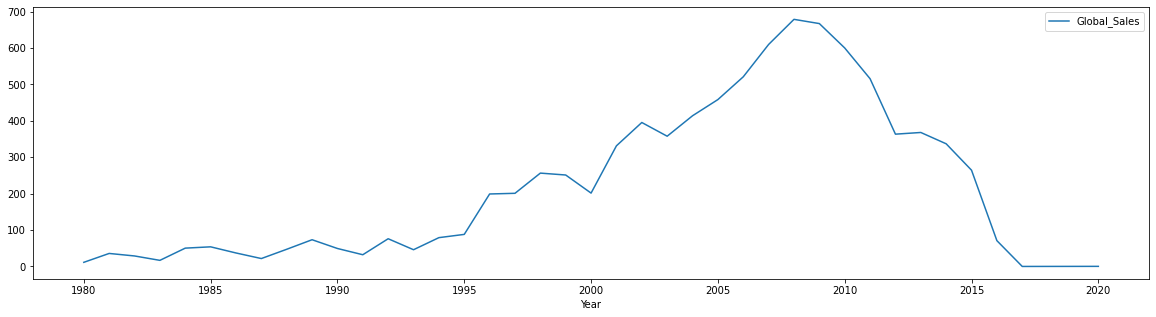

In [ ]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
y = df[['Global_Sales', 'Year']].groupby("Year").sum()
y.plot.line(ax=ax)

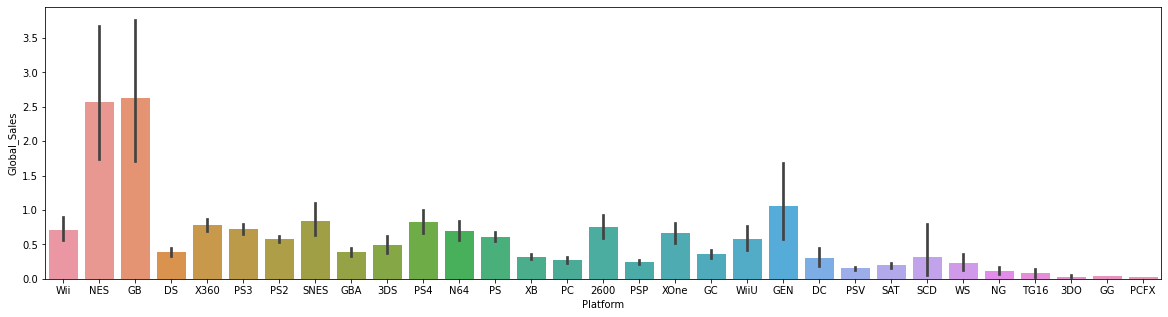

In [ ]:
fig_dims = (20, 5) #Самые большие продажи среди консолей
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=df['Platform'], y=df['Global_Sales'], ax=ax)

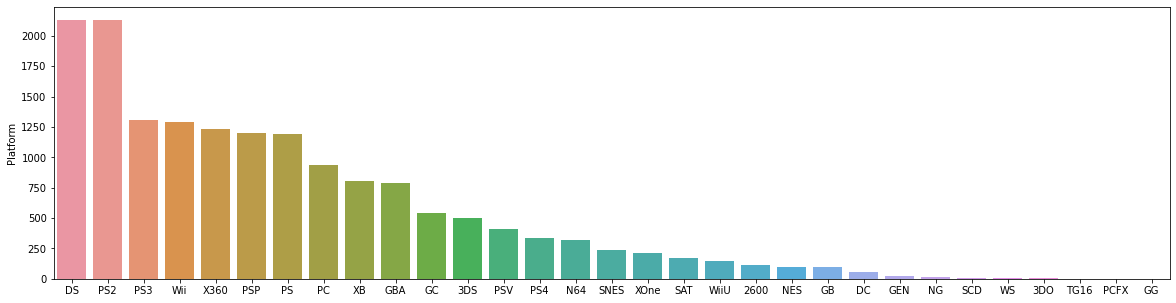

In [ ]:
fig_dims = (20, 5) #Наибольшее количество игр на платформе
fig, ax = plt.subplots(figsize=fig_dims)
y = df['Platform'].value_counts()
ax = sns.barplot(x = df['Platform'].value_counts().index, y = df['Platform'].value_counts(), ax=ax)
plt.show()

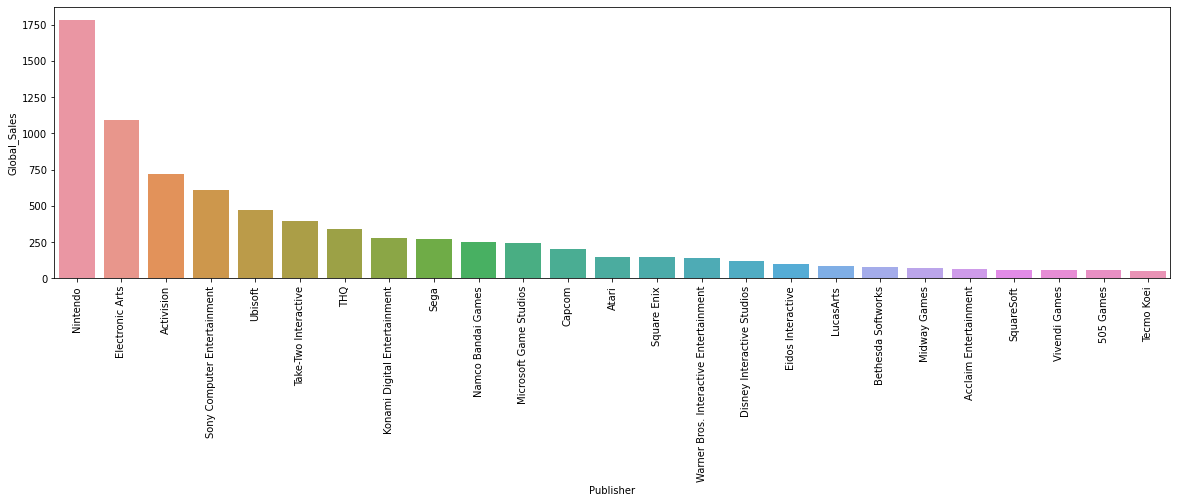

In [ ]:
publishers = df[['Publisher', 'Global_Sales']].groupby("Publisher").sum()
publishers = publishers.nlargest(25, "Global_Sales")
publishers.reset_index(inplace=True)

fig_dims = (20, 5) #Топ-25 компаний по выручке
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=publishers['Publisher'], y=publishers['Global_Sales'], ax=ax)
ax.set_xticklabels(labels=publishers['Publisher'], rotation='vertical', fontsize=10)
plt.show()

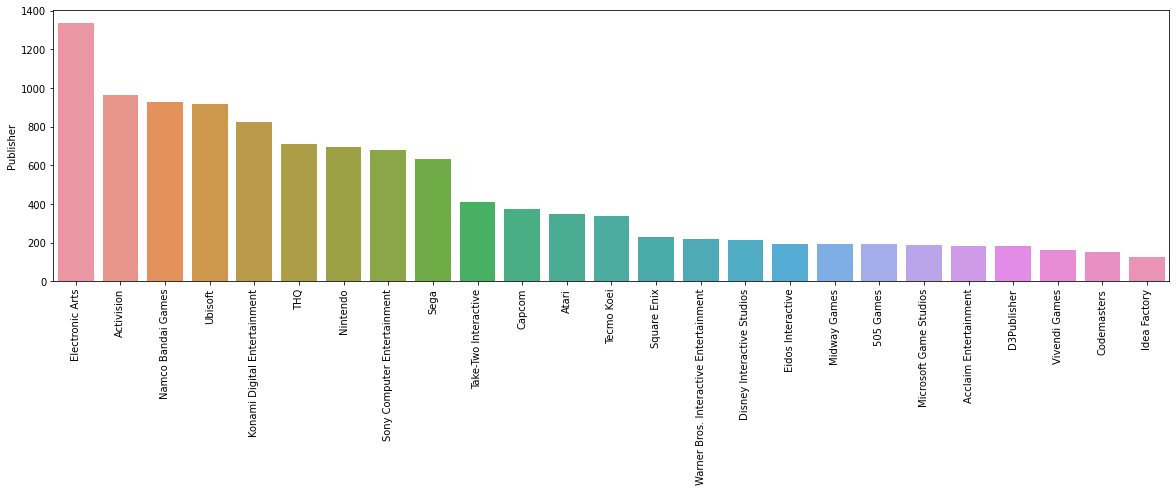

In [ ]:
fig_dims = (20, 5) #Количество игр выпущенных компанией, топ-25
fig, ax = plt.subplots(figsize=fig_dims)
data = df[['Publisher']]
top_25 = data['Publisher'].value_counts().nlargest(25)
ax = sns.barplot(x = top_25.index, y = top_25, ax=ax)
ax.set_xticklabels(labels=top_25.index, rotation='vertical', fontsize=10)
plt.show()

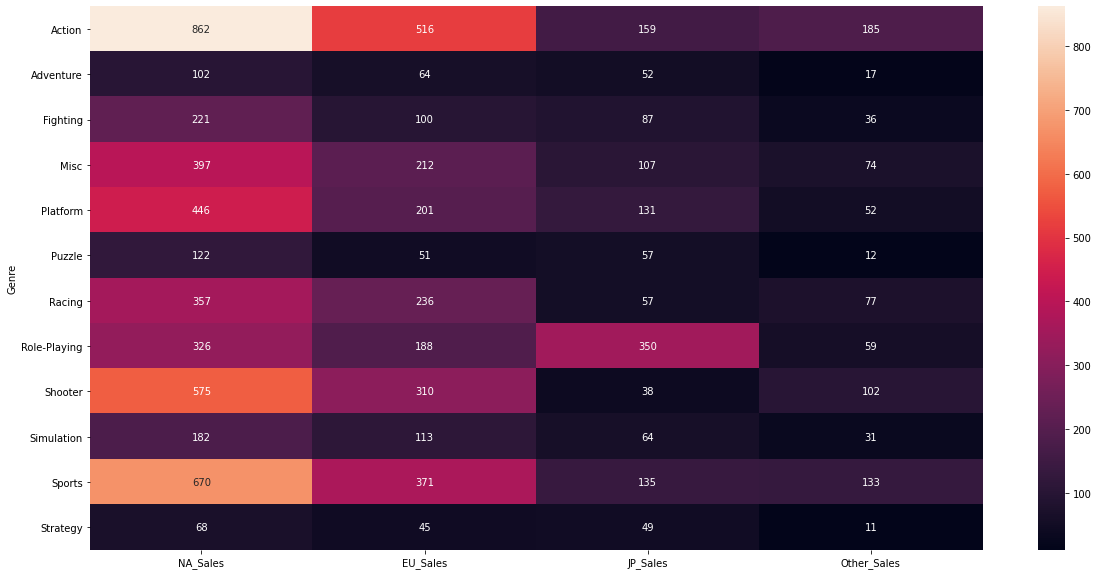

In [ ]:
sales=df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] #Хитмап продаж в разных регионах
sales = sales.groupby('Genre').sum()
plt.figure(figsize=(20,10))
sns.heatmap(sales,annot=True,fmt= '.0f')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


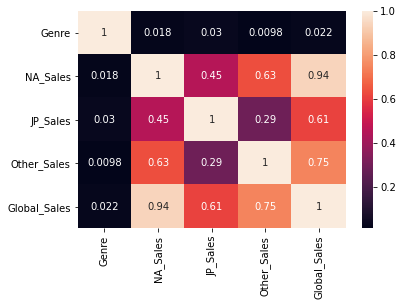

In [ ]:
corr_df = df[['Genre', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] #Карта корреляций платформ и рынков
encoder = LabelEncoder()
corr_df['Genre'] = encoder.fit_transform(corr_df['Genre'])
sns.heatmap(corr_df.corr(), annot=True)

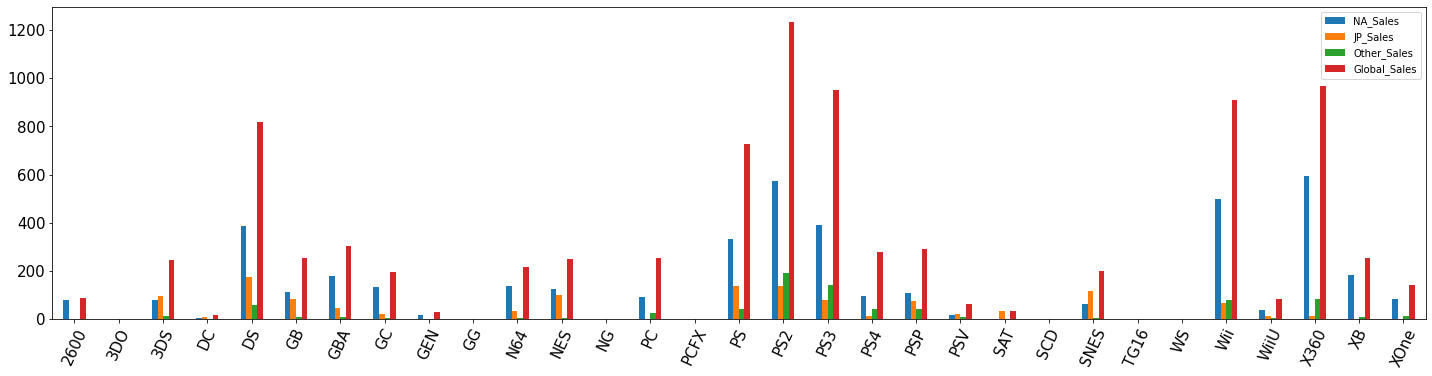

In [ ]:
country_platform = df[['Platform', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby("Platform").sum() #Продажи игр на разных платформах на разных рынках
country_platform.reset_index(inplace=True)
ax = country_platform.plot.bar(figsize=(20,5),fontsize=15)
plt.tight_layout()
ax.set_xticklabels(labels=country_platform['Platform'], rotation=65)
plt.show()

In [ ]:
year_genre_sales = df[['NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year', 'Genre']].groupby(["Year", "Genre"]).sum() #Таблица продаж того или иного жанра в год
year_genre_sales #График не строится, слишком много значений(

NA_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Genre                                                      
1980.0 Action            0.32      0.00         0.00          0.34
       Fighting          0.72      0.00         0.01          0.77
       Misc              2.53      0.00         0.02          2.71
       Shooter           6.56      0.00         0.08          7.07
       Sports            0.46      0.00         0.01          0.49
...                       ...       ...          ...           ...
2016.0 Sports            4.57      0.78         1.92         14.60
       Strategy          0.11      0.05         0.04          0.50
2017.0 Action            0.00      0.01         0.00          0.01
       Role-Playing      0.00      0.04         0.00          0.04
2020.0 Simulation        0.27      0.00         0.02          0.29

[389 rows x 4 columns]

#Пробуем предсказать продажи по жанру и продажам в Японии

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


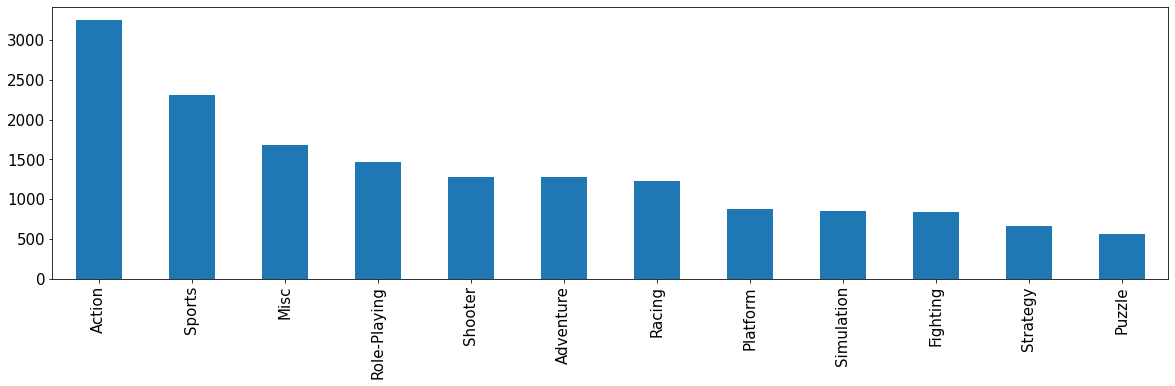

In [ ]:
x = df[['Genre', 'JP_Sales']]
encode = LabelEncoder()
x['Genre'] = encode.fit_transform(x['Genre'])
y = df['NA_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

p = df['Genre'].value_counts()
p.plot.bar(figsize=(20, 5), fontsize=15)

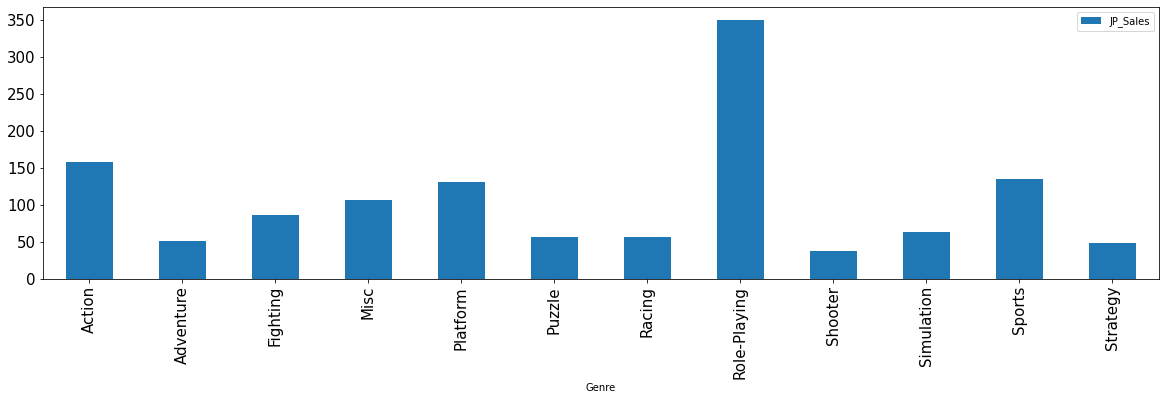

In [ ]:
p1 = df[['Genre', 'JP_Sales']].groupby("Genre").sum()
p1.plot.bar(figsize=(20, 5), fontsize=15)

In [ ]:
svm = SVR()
svm.fit(x_train, y_train)
tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train, y_train)
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train, y_train)
booster = GradientBoostingRegressor(random_state=42)
booster.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
p = svm.predict(x_test)
print("SVR accuracy:",mean_squared_error(y_test, p))
p = tree.predict(x_test)
print("Tree accuracy:",mean_squared_error(y_test, p))
p = forest.predict(x_test)
print("Random Forest accuracy:",mean_squared_error(y_test, p))
p = booster.predict(x_test)
print("Gradient Booster accuracy:",mean_squared_error(y_test, p))

SVR accuracy: 0.7988923683049939
Tree accuracy: 0.8011125037949136
Random Forest accuracy: 0.7636060971247552
Gradient Booster accuracy: 0.6596000218954218


##### Как видно, точность дерева выбора и линейного классификатора довольно высокие, в то время как у случайного леса и градиентного бустинга без тюнинга точность низкая